In [ ]:
!pip install -q folium==0.2.1
!pip install -q GOES
!pip install -q rasterio
!pip install -q rioxarray

     |████████████████████████████████| 69 kB 2.4 MB/s 
     |████████████████████████████████| 6.3 MB 6.3 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 134 kB 48.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.4 MB/s 
     |████████████████████████████████| 8.4 MB 39.5 MB/s 
     |████████████████████████████████| 271 kB 70.0 MB/s 
     |████████████████████████████████| 94 kB 2.6 MB/s 
     |████████████████████████████████| 144 kB 50.7 MB/s 
     |████████████████████████████████| 127 kB 43.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 which is incompatible.
     |████████████████████████████████| 19.3 M

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15,10)

In [ ]:
# Bibliotecas
import GOES
import rasterio as rio
from rasterio.plot import show
import rioxarray as rxr

In [ ]:
# Download
arquivo = GOES.download('goes16', 'ABI-L2-MCMIPF',
                      DateTimeIni = '20210528-180000', # 28/05/2021 18:00:00
                      DateTimeFin = '20210528-181000'  # 28/05/2021 18:10:00
                      , path_out='/content/')

Files:
  OR_ABI-L2-MCMIPF-M6_G16_s20211481800176_e20211481809495_c20211481809590.nc 100% 414.6MB 3m57s


In [ ]:
# Lendo arquivo 
img = rxr.open_rasterio('OR_ABI-L2-MCMIPF-M6_G16_s20211481800176_e20211481809495_c20211481809590.nc')

In [ ]:
# Dimensões do arquivo
img

<xarray.Dataset>
Dimensions:                 (band: 1, x: 5424, y: 5424)
Coordinates:
  * y                       (y) float64 5.434e+06 5.432e+06 ... -5.434e+06
  * x                       (x) float64 -5.434e+06 -5.432e+06 ... 5.434e+06
  * band                    (band) int64 1
    goes_imager_projection  int64 0
Data variables: (12/32)
    CMI_C01                 (band, y, x) int16 ...
    DQF_C05                 (band, y, x) int8 ...
    CMI_C06                 (band, y, x) int16 ...
    DQF_C06                 (band, y, x) int8 ...
    CMI_C07                 (band, y, x) int16 ...
    DQF_C07                 (band, y, x) int8 ...
    ...                      ...
    DQF_C02                 (band, y, x) int8 ...
    CMI_C03                 (band, y, x) int16 ...
    DQF_C03                 (band, y, x) int8 ...
    CMI_C04                 (band, y, x) int16 ...
    DQF_C04                 (band, y, x) int8 ...
    CMI_C05                 (band, y, x) int16 ...
Attributes: (12/29)
    cdm_data_type:             Image
    Conventions:               CF-1.7
    dataset_name:              OR_ABI-L2-MCMIPF-M6_G16_s20211481800176_e20211...
    date_created:              2021-05-28T18:09:59.0Z
    id:                        d72a0223-6e8f-4400-81af-0cc2dfd9f4cc
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    summary:                   Multiple reflectance and emissive channel Clou...
    timeline_id:               ABI Mode 6
    time_coverage_end:         2021-05-28T18:09:49.5Z
    time_coverage_start:       2021-05-28T18:00:17.6Z
    title:                     ABI L2 Cloud and Moisture Imagery

In [ ]:
# Salvando banda 1 em formato .tif
img['CMI_C01'].rio.to_raster('B1.tif')

In [ ]:
# Lendo banda 1
src = rio.open('B1.tif')

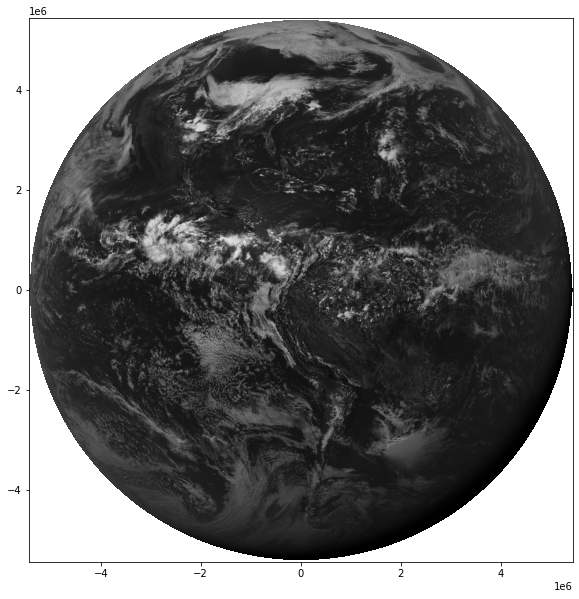

In [ ]:
# Visualizando resultado
show(src,cmap='gray')